In [ ]:
#TODO
# create many lines, store lines --done
# calculate least squares for each line, store --done
# plot weighted mean and weighted standard deviation --done
    # shade standard deviation --done
# try 2d
# use epa.gov data --done?

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
import math
%matplotlib inline
import pandas as pd 
from pandas import DataFrame, read_csv

In [178]:
# read formaldehyde data from lower roxbury (June, July, August 2015)
Location = r'/Users/Annamira/Downloads/AQDM_751558133.txt' 
DF = pd.read_csv(Location, skipfooter=7828, engine='python')
# set y "real data" to formaldehyde data
yRD = DF['value'].values
mean_yRD = np.mean(yRD)

/Users/Annamira/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:45: RuntimeWarning: covariance is not positive-semidefinite.


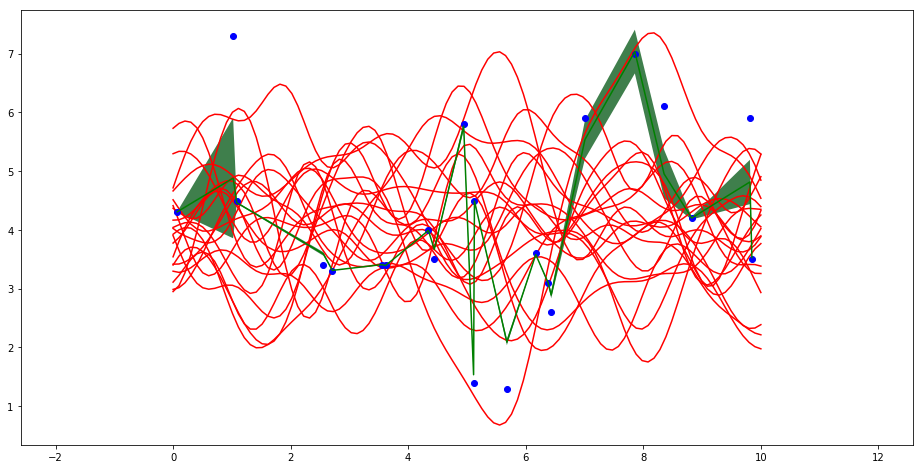

In [183]:
nRD = 22  # number of data points

scale = 0.9  # set scale
L = scale**2

plt.figure(figsize=(16,8))

# create "real" x data -- random x locations

xRD = np.sort(10*np.random.random_sample(nRD))  # random x locations

# old way of generating "real" y data

''''
mean = np.zeros(shape=(nRD,))
cov = np.zeros(shape=(nRD,nRD))

# fill in covariance matrix as a function of generated "real data" x locations
for a in range(0,nRD):
    for b in range(0,nRD):
        cov[a][b] = math.exp(-((xRD[b]-xRD[a])**2)/L)

yRD = np.random.multivariate_normal(mean, cov, 1).T  # generate y data ("pollution levels")

'''''

# plot many lines and store each in a (num_lines, 2, n) shaped array

num_lines = 20
lines = np.zeros(shape=(num_lines), dtype=object)
eval_points = 100

for i in range(0, num_lines):
    
    x = np.linspace(0, 10, eval_points)  #10*np.random.random_sample(n)  # random x locations

    mean = mean_yRD + np.zeros(shape=(eval_points,)) # set mean of generated lines epa.gov data mean
    cov = np.zeros(shape=(eval_points,eval_points))

    # fill in covariance matrix as a function of generated x locations
    for a in range(0,eval_points):
        for b in range(0,eval_points):
            cov[a][b] = math.exp(-((x[b]-x[a])**2)/L)

    y = np.random.multivariate_normal(mean, cov, 1).T  # generate y data ("pollution levels")
  
    lines[i] = splrep(x, y, xb=None, xe=None, k=1)
    plt.plot(x, splev(x, lines[i], der=0), 'r-')
    
    # plt.plot(x, y, 'r-', alpha=0.7)

    plt.axis('equal')

    
# plot real data
plt.plot(xRD, yRD, 'bo')
    

# calculate and store squared error

# create arrays to hold squared error and weighted squared error
squared_err =  np.zeros(shape=(nRD, num_lines), dtype=object)
weighted = np.zeros(shape=(nRD, num_lines), dtype=object)

# keep track of coefficients/scores
sum_weights = np.zeros(shape=(nRD))

# calculate
for a in range(0, num_lines):
    for b in range(0, nRD):
        y_val = splev(xRD[b], lines[a], der=0)
        squared_err[b][a] = (yRD[b]-y_val)**2
        sum_weights[b] = sum_weights[b] + 1/squared_err[b][a]
        weighted[b][a] = y_val/squared_err[b][a]


# calculate weighted means and standard deviations

mean = np.zeros(shape=(nRD))
deviation = np.zeros(shape=(nRD))

for a in range(0, nRD):
    
    # accumulate weighted values
    for b in range(0, num_lines):
        mean[a] += weighted[a][b]
        deviation[a] += weighted[a][b]**2
    
    # divide
    mean[a] = mean[a]/sum_weights[a]
    deviation[a] = deviation[a]/sum_weights[a]**3

# plot mean and standard deviation

plt.plot(xRD, mean, 'g-')
plt.fill_between(xRD, mean-deviation, mean+deviation, facecolor='#3F7F4C')


In [ ]:
#idx= np.argsort(x)
#xs = x[idx]
#ys = y[idx]